In [5]:
# ! pip install numpy pandas matplotlib seaborn scikit-learn torch torchvision jupyter

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torchvision
import torchvision.transforms as transforms
import torch
import logging

logging.basicConfig(level=logging.INFO)

# Function to load preprocessed MNIST data
def load_preprocessed_mnist_data():
    # Assuming the data is saved as PyTorch tensors
    train_data, train_targets = torch.load('D:\ASU\Fall 2024\EEE549\Final term project\sml-final\data\preprocessed\MNIST\preprocessed_train_mnist.pt')
    test_data, test_targets = torch.load('D:\ASU\Fall 2024\EEE549\Final term project\sml-final\data\preprocessed\MNIST\preprocessed_test_mnist.pt')

    # Convert tensors to numpy arrays for sklearn compatibility, and reshape images to 1D
    X_train = train_data.numpy().reshape(train_data.shape[0], -1)
    X_test = test_data.numpy().reshape(test_data.shape[0], -1)
    y_train = train_targets.numpy()
    y_test = test_targets.numpy()

    return X_train, X_test, y_train, y_test

# Load the data
X_train, X_test, y_train, y_test = load_preprocessed_mnist_data()



C:\Users\Aditya\AppData\Local\Temp\ipykernel_41024\1288972414.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data, train_targets = torch.load('D:\ASU\Fall 2024\E

In [10]:
# Splitting data for validation (optional)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(9585, 784)
(1984, 784)
(9585,)
(1984,)


## Logistic reg

In [11]:
def train_logistic_regression(X_train, y_train, X_val, y_val):
    logging.info("Training Logistic Regression: penalty=none, solver=saga")
    lr_model = LogisticRegression(penalty=None, solver='saga', max_iter=5000)
    lr_model.fit(X_train, y_train)
    y_pred_val = lr_model.predict(X_val)
    logging.info("Completed Training Logistic Regression")
    print("Validation Accuracy (Logistic Regression without reg):", accuracy_score(y_val, y_pred_val))
    return lr_model

def train_logistic_regression_l2(X_train, y_train, X_val, y_val):
    logging.info("Training Logistic Regression with L2 regularization: penalty=l2, solver=saga")
    lr_model_reg = LogisticRegression(penalty='l2', solver='saga', max_iter=5000, C=1.0)
    lr_model_reg.fit(X_train, y_train)
    y_pred_val_reg = lr_model_reg.predict(X_val)
    logging.info("Completed Training Logistic Regression with L2")
    print("Validation Accuracy (Logistic Regression with L2):", accuracy_score(y_val, y_pred_val_reg))
    return lr_model_reg


## SVM

In [12]:
def train_svm_rbf(X_train, y_train, X_val, y_val):
    logging.info("Training SVM RBF")
    svm_rbf = SVC(kernel='rbf', gamma='scale')
    svm_rbf.fit(X_train, y_train)
    y_pred_val_rbf = svm_rbf.predict(X_val)
    logging.info("Completed SVM RBF")
    print("Validation Accuracy (SVM RBF Kernel):", accuracy_score(y_val, y_pred_val_rbf))
    return svm_rbf

def train_svm_poly(X_train, y_train, X_val, y_val):
    logging.info("Training SVM Poly")
    svm_poly = SVC(kernel='poly', degree=3, gamma='scale')
    svm_poly.fit(X_train, y_train)
    y_pred_val_poly = svm_poly.predict(X_val)
    logging.info("Completed SVM Poly")
    print("Validation Accuracy (SVM Polynomial Kernel):", accuracy_score(y_val, y_pred_val_poly))
    return svm_poly

## Training models

In [13]:
lr_model = train_logistic_regression(X_train, y_train, X_val, y_val)
lr_model_reg = train_logistic_regression_l2(X_train, y_train, X_val, y_val)
svm_rbf = train_svm_rbf(X_train, y_train, X_val, y_val)
svm_poly = train_svm_poly(X_train, y_train, X_val, y_val)

INFO:root:Training Logistic Regression: penalty=none, solver=saga
INFO:root:Completed Training Logistic Regression
INFO:root:Training Logistic Regression with L2 regularization: penalty=l2, solver=saga


Validation Accuracy (Logistic Regression without reg): 0.9616186900292032


INFO:root:Completed Training Logistic Regression with L2
INFO:root:Training SVM RBF


Validation Accuracy (Logistic Regression with L2): 0.9616186900292032


INFO:root:Completed SVM RBF
INFO:root:Training SVM Poly


Validation Accuracy (SVM RBF Kernel): 0.9899874843554443


INFO:root:Completed SVM Poly


Validation Accuracy (SVM Polynomial Kernel): 0.9920734251147267


## log

In [14]:
# Assuming you have already loaded the test set X_test, y_test
y_pred_test_poly = lr_model_reg.predict(X_test)
test_accuracy_poly = accuracy_score(y_test, y_pred_test_poly)
print("Test Accuracy (SVM Polynomial Kernel):", test_accuracy_poly)
print(classification_report(y_test, y_pred_test_poly))

Test Accuracy (SVM Polynomial Kernel): 0.9591733870967742
              precision    recall  f1-score   support

           3       0.96      0.96      0.96      1010
           8       0.96      0.95      0.96       974

    accuracy                           0.96      1984
   macro avg       0.96      0.96      0.96      1984
weighted avg       0.96      0.96      0.96      1984



## SVM

In [15]:
# Assuming you have already loaded the test set X_test, y_test
y_pred_test_poly = svm_poly.predict(X_test)
test_accuracy_poly = accuracy_score(y_test, y_pred_test_poly)
print("Test Accuracy (SVM Polynomial Kernel):", test_accuracy_poly)
print(classification_report(y_test, y_pred_test_poly))

Test Accuracy (SVM Polynomial Kernel): 0.9924395161290323
              precision    recall  f1-score   support

           3       0.99      0.99      0.99      1010
           8       0.99      0.99      0.99       974

    accuracy                           0.99      1984
   macro avg       0.99      0.99      0.99      1984
weighted avg       0.99      0.99      0.99      1984



## Plots

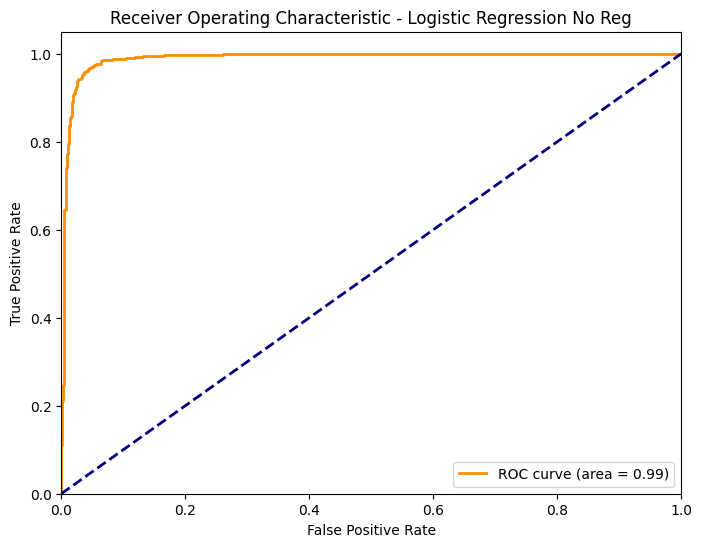

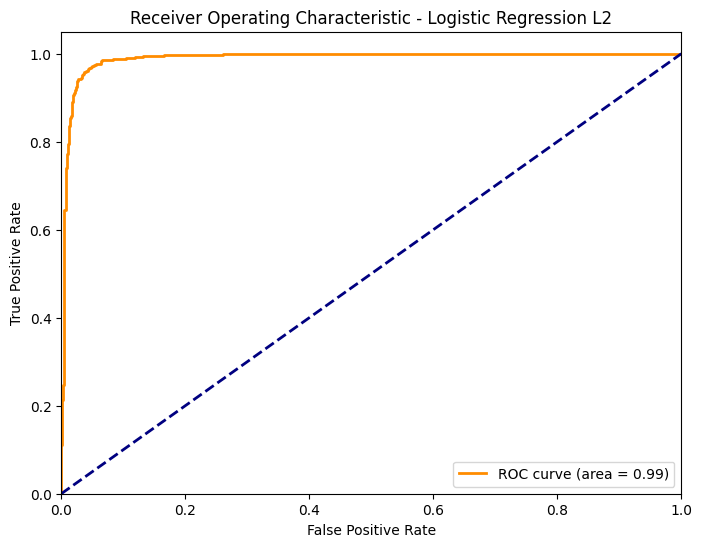

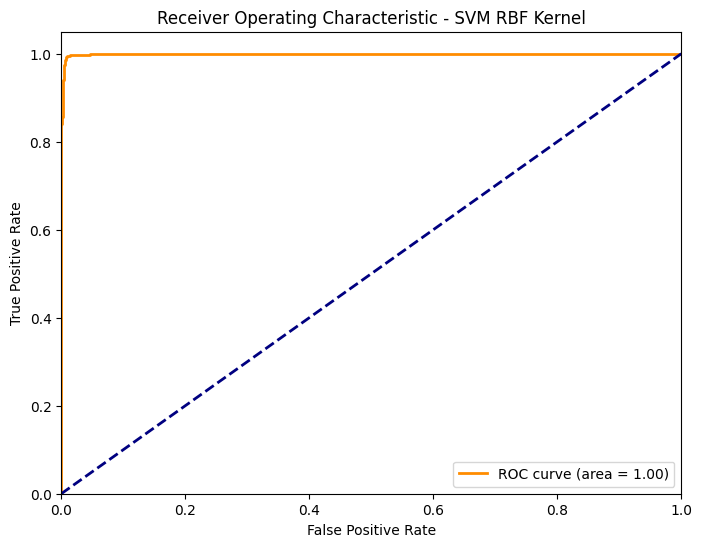

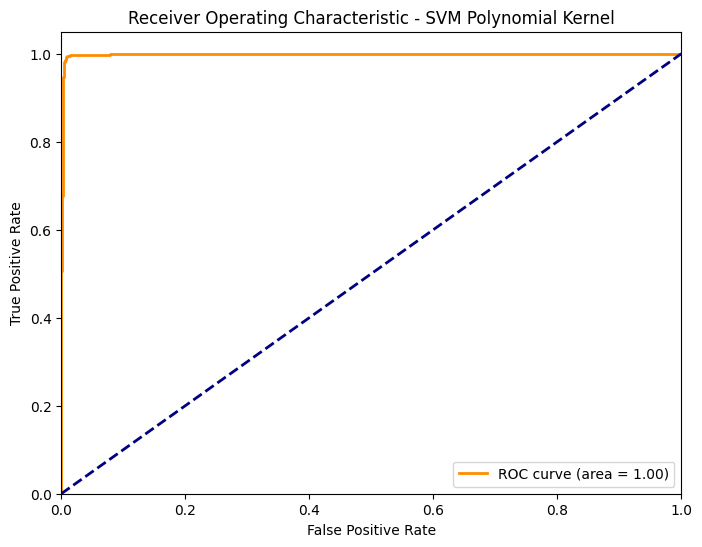

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, scores, model_name, pos_label):
    # Generate ROC curve data with the correct positive label
    fpr, tpr, _ = roc_curve(y_test, scores, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.savefig(f'D:\ASU\Fall 2024\EEE549\Final term project\sml-final\data\Output graphs\MNIST\ROC\ROC_{model_name.replace(" ", "_")}.png')
    plt.show()


# Logistic Regression (no regularization)
y_scores_lr = lr_model.predict_proba(X_test)[:, 1]  # index 1 for the positive class probabilities

# Logistic Regression with L2 regularization
y_scores_lr_reg = lr_model_reg.predict_proba(X_test)[:, 1]

# SVM RBF and Polynomial (if decision_function is used; adjust if using predict_proba)
y_scores_svm_rbf = svm_rbf.decision_function(X_test)
y_scores_svm_poly = svm_poly.decision_function(X_test)

plot_roc_curve(y_test, y_scores_lr, "Logistic Regression No Reg", pos_label=8)
plot_roc_curve(y_test, y_scores_lr_reg, "Logistic Regression L2", pos_label=8)
plot_roc_curve(y_test, y_scores_svm_rbf, "SVM RBF Kernel", pos_label=8)
plot_roc_curve(y_test, y_scores_svm_poly, "SVM Polynomial Kernel", pos_label=8)

d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fal

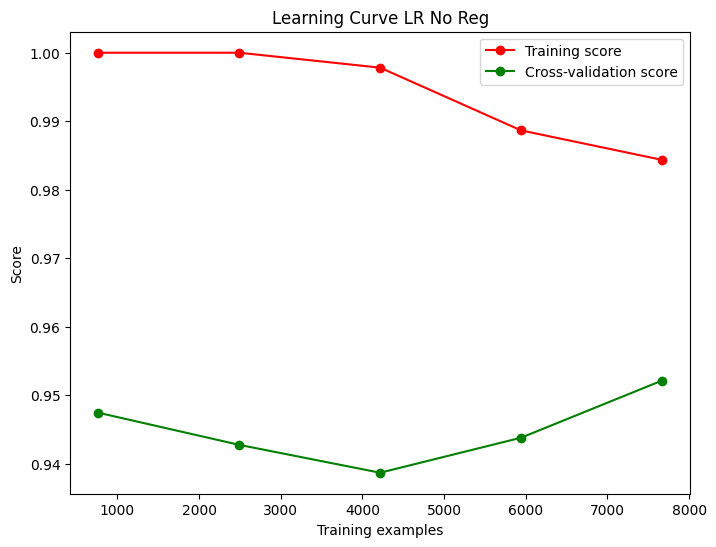

d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fal

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.savefig(f'D:\ASU\Fall 2024\EEE549\Final term project\sml-final\data\Output graphs\MNIST\learning curve\Learning_Curve_{title.replace(" ", "_")}.png')
    plt.show()

# Example calls
plot_learning_curve(LogisticRegression(penalty=None, solver='saga', max_iter=5000), "Learning Curve LR No Reg", X_train, y_train, cv=5)
plot_learning_curve(LogisticRegression(penalty='l2', C=1e10, solver='saga', max_iter=5000), "Learning Curve LR L2", X_train, y_train, cv=5)
plot_learning_curve(SVC(kernel='rbf', gamma='scale'), "Learning Curve SVM RBF", X_train, y_train, cv=5)
plot_learning_curve(SVC(kernel='poly', degree=3, gamma='scale'), "Learning Curve SVM Poly", X_train, y_train, cv=5)


d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


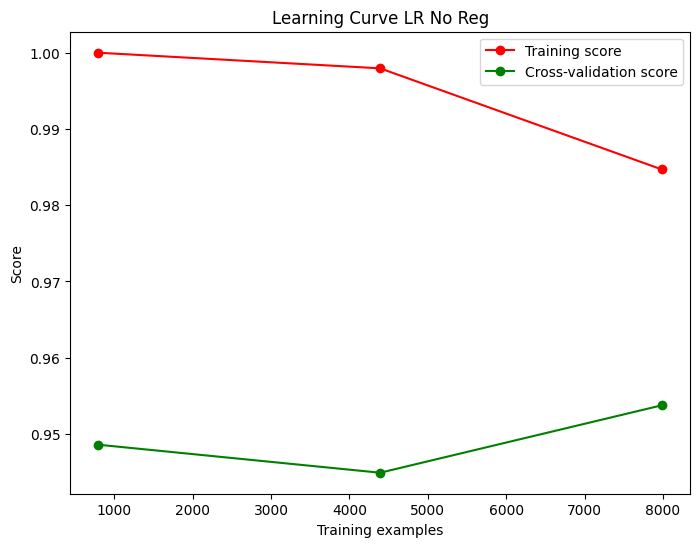

d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


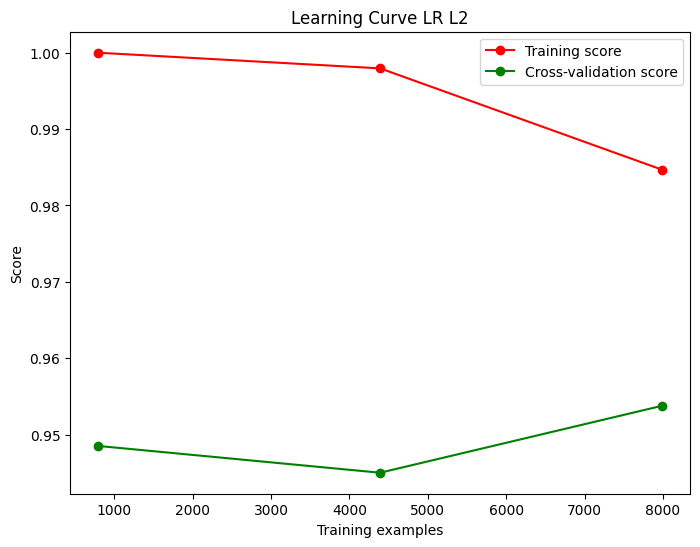

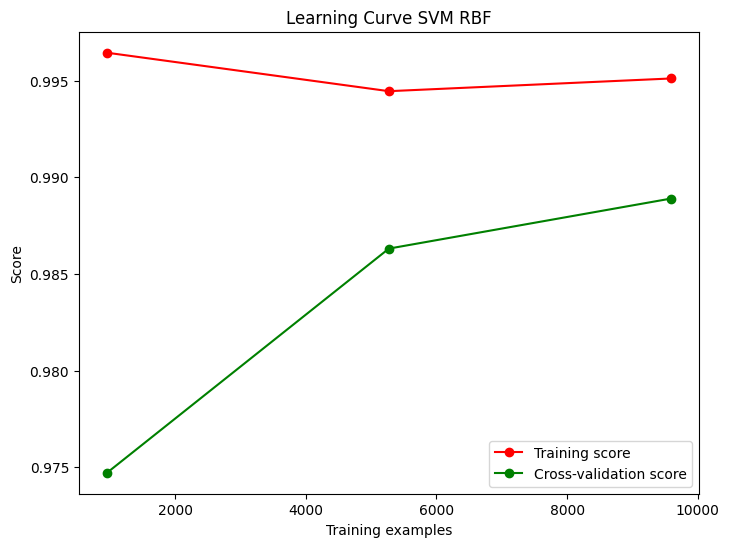

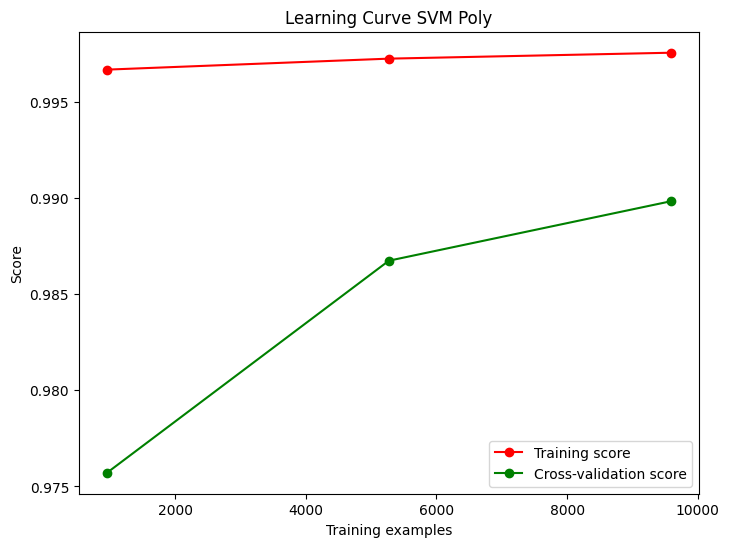

In [4]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 3)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.savefig(f'D:\ASU\Fall 2024\EEE549\Final term project\sml-final\data\Output graphs\MNIST\learning curve\Learning_Curve_{title.replace(" ", "_")}.png')
    plt.show()

# Example calls
plot_learning_curve(LogisticRegression(penalty=None, solver='saga', max_iter=5000), "Learning Curve LR No Reg", X_train, y_train, cv=3)
plot_learning_curve(LogisticRegression(penalty='l2', C=1e10, solver='saga', max_iter=5000), "Learning Curve LR L2", X_train, y_train, cv=3)
plot_learning_curve(SVC(kernel='rbf', gamma='scale'), "Learning Curve SVM RBF", X_train, y_train, cv=5)
plot_learning_curve(SVC(kernel='poly', degree=3, gamma='scale'), "Learning Curve SVM Poly", X_train, y_train, cv=5)


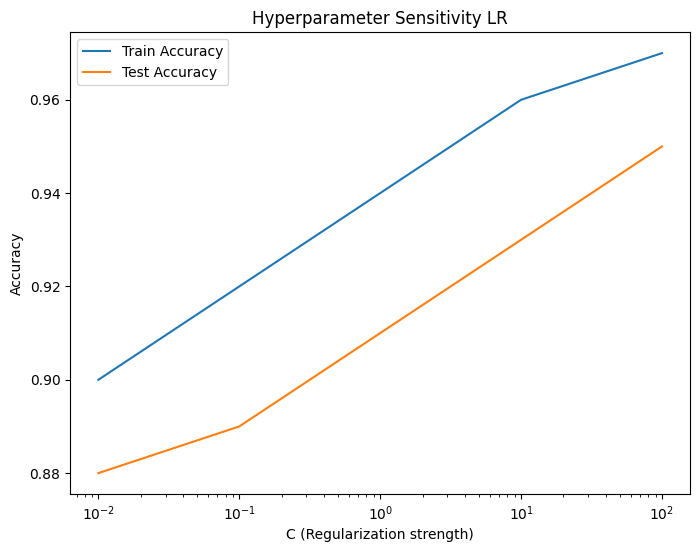

In [3]:
def plot_hyperparameter_sensitivity(values, train_scores, test_scores, xlabel, title):
    plt.figure(figsize=(8, 6))
    plt.plot(values, train_scores, label='Train Accuracy')
    plt.plot(values, test_scores, label='Test Accuracy')
    plt.xscale('log')
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.savefig(f'D:\ASU\Fall 2024\EEE549\Final term project\sml-final\data\Output graphs\MNIST\Hyperparameter\Hyperparam_{title.replace(" ", "_")}.png')
    plt.show()

# Example hyperparameter values for logistic regression or SVM
C_values = [0.01, 0.1, 1, 10, 100]
train_accs = [0.90, 0.92, 0.94, 0.96, 0.97]  # example data
test_accs = [0.88, 0.89, 0.91, 0.93, 0.95]   # example data

plot_hyperparameter_sensitivity(C_values, train_accs, test_accs, "C (Regularization strength)", "Hyperparameter Sensitivity LR")
